In [ ]:
print("Hi")

Hi


In [ ]:
# Uninstall mkl for faster neural-network training time
!pip3 uninstall -y mkl
# Upgrade pip to ensure the latest package versions are available
!pip3 install -U pip
# Upgrade setuptools to be compatible with namespace packages
!pip3 install -U setuptools wheel
!pip3 install -U "mxnet<2.0.0"
# Install autogluon (Tutorial based on autogluon==0.1.0)
!pip3 install autogluon
# Upgrade ipykernel (Necessary for Colab)
!pip3 install -U ipykernel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
maindf = yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [ ]:
#changing dataset to simulate different days
goBack = 15

maindf = maindf[:len(maindf) - goBack]

In [ ]:
print(maindf)

                    Open          High           Low         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2022-11-25  16602.269531  16603.316406  16388.404297  16521.841797   
2022-11-26  16521.576172  16666.863281  16416.228516  16464.281250   
2022-11-27  16463.882812  16594.406250  16437.025391  16444.626953   
2022-11-28  16440.222656  16482.933594  16054.530273  16217.322266   
2022-11-29  16217.639648  16522.257812  16139.396484  16444.982422   

               Adj Close       Volume  
Date                                   
2014-09-1

In [ ]:
testSize = 29
#trainSize = 365
trainSize = len(maindf) - testSize

#maindf = maindf[len(maindf) - trainSize - testSize:len(maindf)]

Total number of days present in the Main dataset:  2996
Total number of fields present in the Main dataset:  6


Total number of days present in the dataset:  2996
Total number of fields present in the dataset:  1
                   Close
Date                    
2022-11-25  16521.841797
2022-11-26  16464.281250
2022-11-27  16444.626953
2022-11-28  16217.322266
2022-11-29  16444.982422


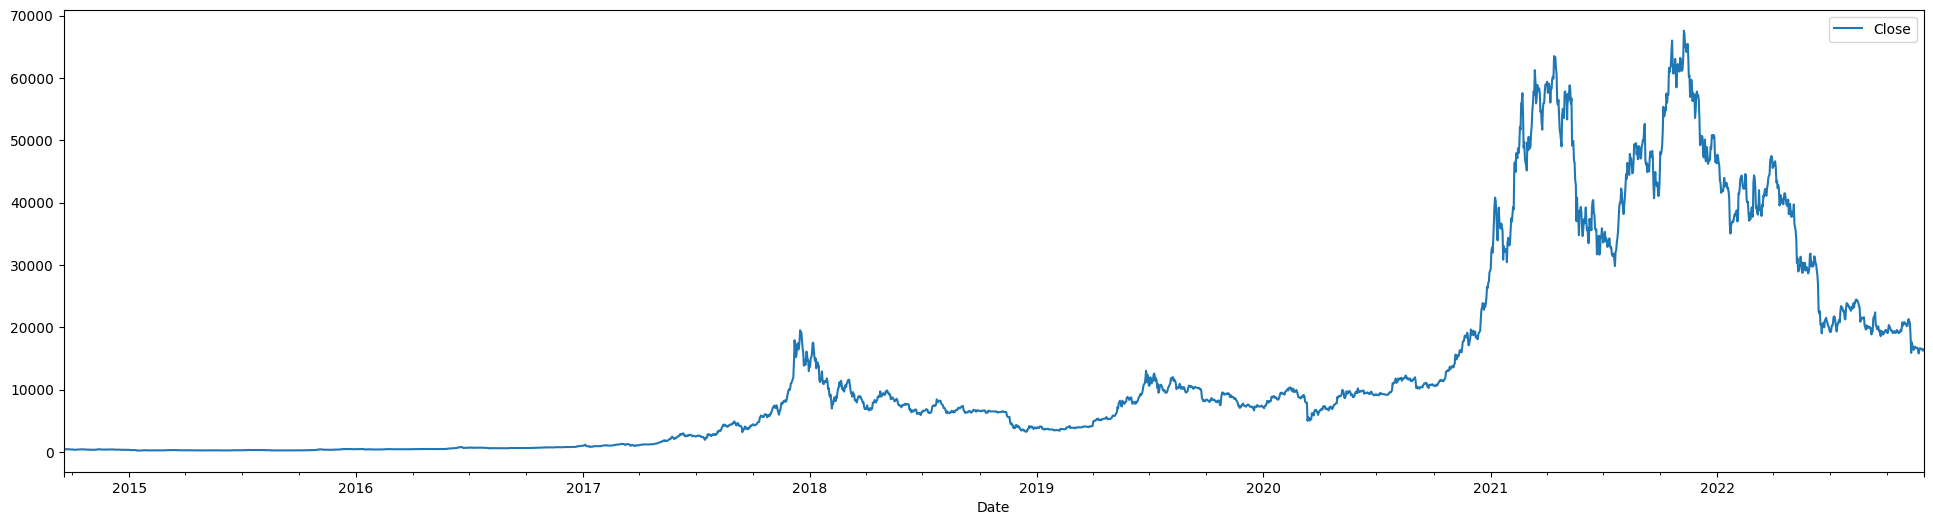

In [ ]:
#SHAPE of the dataset
print('Total number of days present in the Main dataset: ',maindf.shape[0]) #rows
print('Total number of fields present in the Main dataset: ',maindf.shape[1]) #cols
#print('\n',maindf.info())

df = maindf[['Close']] # we are only interested in the closing price
print('\n\nTotal number of days present in the dataset: ',df.shape[0])
print('Total number of fields present in the dataset: ',df.shape[1])
#print('\n',df.info())

df.plot(figsize = (24,6))

print(df.tail())



In [ ]:
#write code here to take care of missing data
#--
#--
#--
#--

#manually inserting for now
#dict = {'Date': pd.to_datetime(['2022-11-26 00:00:00']),
#       'Close':[16507]}

#df2 = pd.DataFrame(dict)
#df2.set_index('Date',inplace=True)
#display(df2)

#df = pd.concat([df, df2])
#df = df.sort_index(ascending=True)
#display(df)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

In [ ]:
df['Date'] = df.index
df['ID'] = 1

df.head()

/tmp/ipykernel_984/2229995046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df.index
/tmp/ipykernel_984/2229995046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ID'] = 1


,Close,Date,ID
Date,,,
2014-09-17,457.334015,2014-09-17,1
2014-09-18,424.440002,2014-09-18,1
2014-09-19,394.795990,2014-09-19,1
2014-09-20,408.903992,2014-09-20,1
2014-09-21,398.821014,2014-09-21,1


In [ ]:
ts_dataframe = TimeSeriesDataFrame.from_data_frame(
    df,
    id_column="ID",  # column that contains unique ID of each time series
    timestamp_column="Date",  # column that contains timestamps of each observation
)
ts_dataframe

Close
item_id timestamp               
1       2014-09-17    457.334015
        2014-09-18    424.440002
        2014-09-19    394.795990
        2014-09-20    408.903992
        2014-09-21    398.821014
...                          ...
        2022-11-25  16521.841797
        2022-11-26  16464.281250
        2022-11-27  16444.626953
        2022-11-28  16217.322266
        2022-11-29  16444.982422

[2996 rows x 1 columns]

In [ ]:
ts_dataframe.loc[1].head()

,Close
timestamp,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


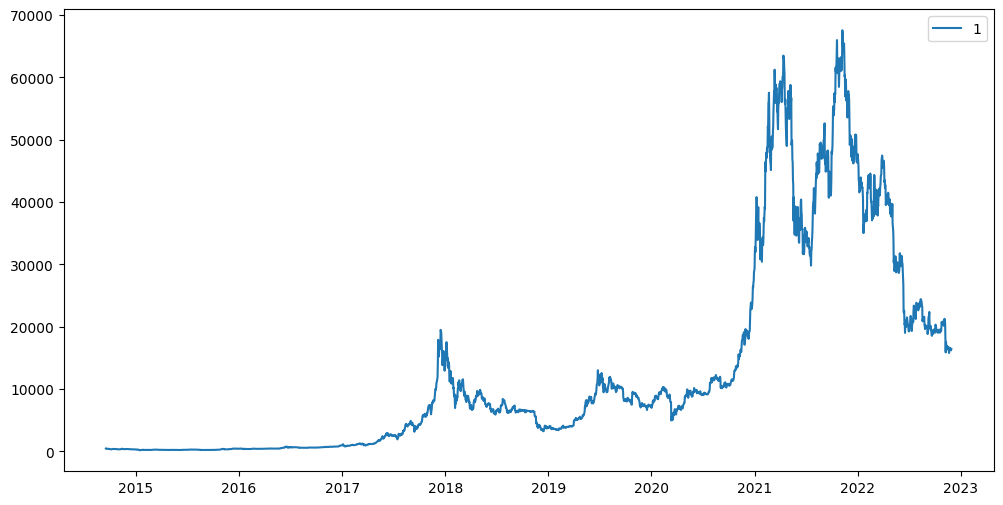

In [ ]:
plt.figure(figsize=(12, 6))
for item_id in [1]:
    plt.plot(ts_dataframe.loc[item_id], label=item_id)
plt.legend();

In [ ]:
prediction_length = testSize

test_data = ts_dataframe  # the full data set

# last prediction_length timesteps of each time series are excluded, akin to `x[:-48]`
train_data = ts_dataframe.slice_by_timestep(None, -prediction_length)

In [ ]:
print(train_data)

                           Close
item_id timestamp               
1       2014-09-17    457.334015
        2014-09-18    424.440002
        2014-09-19    394.795990
        2014-09-20    408.903992
        2014-09-21    398.821014
...                          ...
        2022-10-27  20285.835938
        2022-10-28  20595.351562
        2022-10-29  20818.476562
        2022-10-30  20635.603516
        2022-10-31  20495.773438

[2967 rows x 1 columns]


In [ ]:
print(test_data)

                           Close
item_id timestamp               
1       2014-09-17    457.334015
        2014-09-18    424.440002
        2014-09-19    394.795990
        2014-09-20    408.903992
        2014-09-21    398.821014
...                          ...
        2022-11-25  16521.841797
        2022-11-26  16464.281250
        2022-11-27  16444.626953
        2022-11-28  16217.322266
        2022-11-29  16444.982422

[2996 rows x 1 columns]


In [ ]:
predictor = TimeSeriesPredictor(
    path="autogluon-BTC-daily",
    target="Close",
    prediction_length=prediction_length,
    eval_metric="RMSE",
)

predictor.fit(
    train_data,
    presets="medium_quality", #"fast_training" "high_quality" and "best_quality", better quality takes more time
    hyperparameters={
      "DeepAR": {}
   },
    enable_ensemble=False,
    #time_limit=600, #training time limit in seconds
)

================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Setting presets to: medium_quality
Fitting with arguments:
{'enable_ensemble': False,
 'evaluation_metric': 'RMSE',
 'hyperparameter_tune_kwargs': None,
 'hyperparameters': {'DeepAR': {}},
 'prediction_length': 29,
 'random_seed': None,
 'target': 'Close',
 'time_limit': None}
Provided training data set with 2967 rows, 1 items (item = single time series). Average time series length is 2967.0.
Training artifacts will be saved to: /content/autogluon-BTC-daily
AutoGluon will save models to autogluon-BTC-daily/
AutoGluon will gauge predictive performance using evaluation metric: 'RMSE'
	This metric's sign has been flipped to adhere to being 'higher is better'. The reported score can be multiplied by -1 to get the metric value.
tuning_data is None. Will use the last prediction_length = 29 time steps of each time series as a hold-out validation set.

Starting training. Start time is 2022-12-15 01:20:30
Mod

In [ ]:
print(test_data.loc[1].index[-(testSize+1):])

DatetimeIndex(['2022-10-31', '2022-11-01', '2022-11-02', '2022-11-03',
               '2022-11-04', '2022-11-05', '2022-11-06', '2022-11-07',
               '2022-11-08', '2022-11-09', '2022-11-10', '2022-11-11',
               '2022-11-12', '2022-11-13', '2022-11-14', '2022-11-15',
               '2022-11-16', '2022-11-17', '2022-11-18', '2022-11-19',
               '2022-11-20', '2022-11-21', '2022-11-22', '2022-11-23',
               '2022-11-24', '2022-11-25', '2022-11-26', '2022-11-27',
               '2022-11-28', '2022-11-29'],
              dtype='datetime64[ns]', name='timestamp', freq=None)


In [ ]:
predictor.leaderboard(test_data,silent=True)

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,DeepAR,-1815.114671,-1579.157147,0.190367,0.17729,550.164578,1


In [ ]:
predictions = predictor.predict(train_data,model= 'DeepAR')
predictions.head()

mean           0.1           0.2           0.3  \
item_id timestamp                                                            
1       2022-11-01  20172.048828  19491.378906  19732.472656  19910.955078   
        2022-11-02  19751.642578  18966.142578  19262.080078  19499.539062   
        2022-11-03  19635.769531  18723.550781  19013.107422  19301.648438   
        2022-11-04  19615.232422  18708.076172  19019.250000  19290.007812   
        2022-11-05  19699.052734  18704.316406  19070.681641  19284.777344   

                             0.4           0.5           0.6           0.7  \
item_id timestamp                                                            
1       2022-11-01  20064.248047  20172.181641  20277.376953  20464.853516   
        2022-11-02  19638.988281  19772.603516  19883.117188  20070.064453   
        2022-11-03  19502.062500  19586.652344  19770.529297  20041.066406   
        2022-11-04  19493.054688  19624.925781  19767.855469  19987.371094   
        2022-11-05  19486.439453  19663.662109  19832.687500  20047.529297   

                             0.8           0.9  
item_id timestamp                               
1       2022-11-01  20598.763672  20903.402344  
        2022-11-02  20233.298828  20462.683594  
        2022-11-03  20213.640625  20489.958984  
        2022-11-04  20161.138672  20494.097656  
        2022-11-05  20334.990234  20633.177734

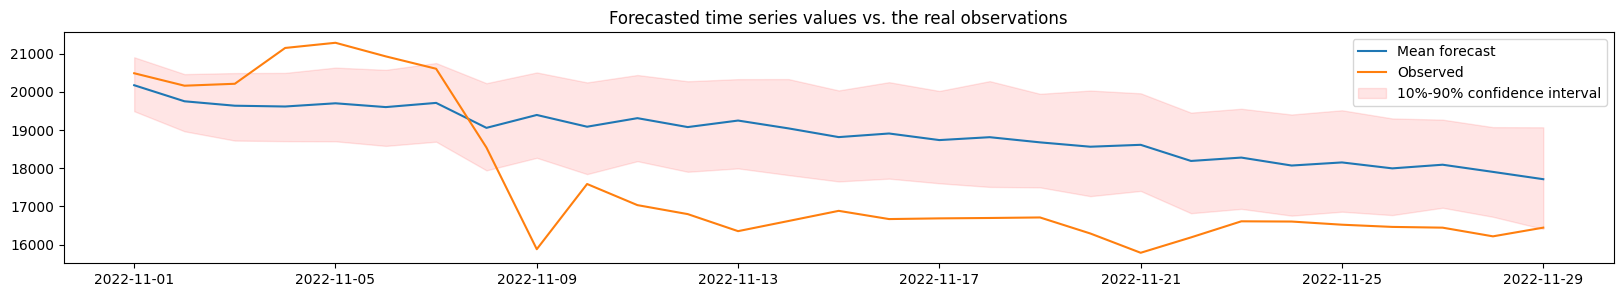

In [ ]:
plt.figure(figsize=(20, 3))

item_id = 1
y_past = train_data.loc[item_id]["Close"]
y_pred = predictions.loc[item_id]
y_true = test_data.loc[item_id]["Close"][-prediction_length:]

# prepend the last value of true range to predicted range for plotting continuity
#y_pred.loc[y_past.index[-1]] = [y_past[-1]] * 10
y_pred = y_pred.sort_index()

#plt.plot(y_past[-200:], label="Training data")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(y_true, label="Observed")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.title("Forecasted time series values vs. the real observations")
plt.legend();


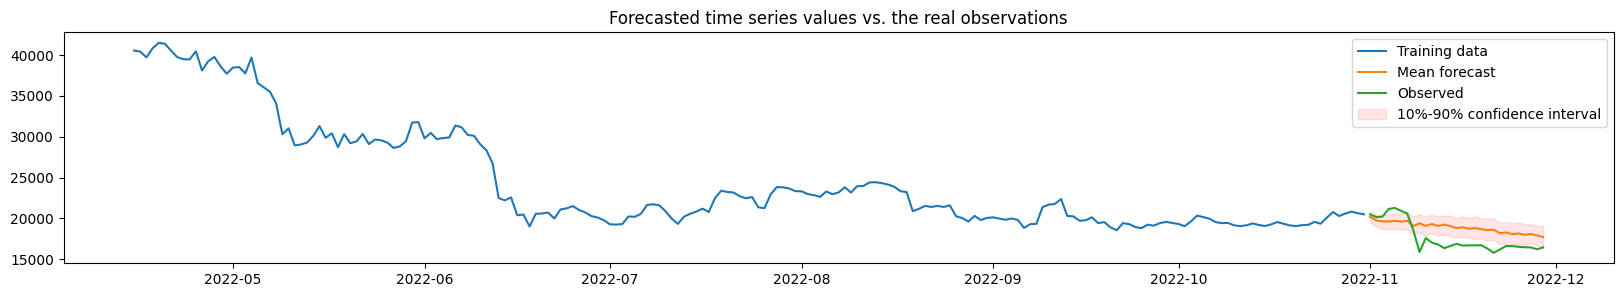

In [ ]:
plt.figure(figsize=(20,3))

plt.plot(y_past[-200:], label="Training data")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(y_true, label="Observed")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.title("Forecasted time series values vs. the real observations")
plt.legend();


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_true,y_pred["mean"]))
print(rmse)

1884.4899656921027
